### [1] Load Data and Examing
将训练数据和检测数据加载到内存中(第一次运行需要下载数据, 会比较慢):  

train_images是用于训练系统的手写数字图片;  

train_labels是用于标注图片的信息;  

test_images是用于检测系统训练效果的图片;  

test_labels是test_images图片对应的数字标签。 


In [10]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train_images.shape = ',train_images.shape)
print('train_labels = ', train_labels)
print('test_images.shape = ', test_images.shape)
print('test_labels', test_labels)

train_images.shape =  (60000, 28, 28)
train_labels =  [5 0 4 ... 5 6 8]
test_images.shape =  (10000, 28, 28)
test_labels [7 2 1 ... 4 5 6]


1.train_images.shape打印结果表明, train_images是一个含有60000个元素的数组.  
数组中的元素是一个二维数组, 二维数组的行和列都是28.  
也就是说, 一个数字图片的大小是28*28.  

2.train_lables打印结果表明, 第一张手写数字图片的内容是数字5, 第二种图片是数字0, 以此类推.  

3.test_images.shape的打印结果表示, 用于检验训练效果的图片有10000张.  

4.test_labels输出结果表明, 用于检测的第一张图片内容是数字7, 第二张是数字2, 依次类推.  

### [2] 把用于测试的第一张图片打印出来看看


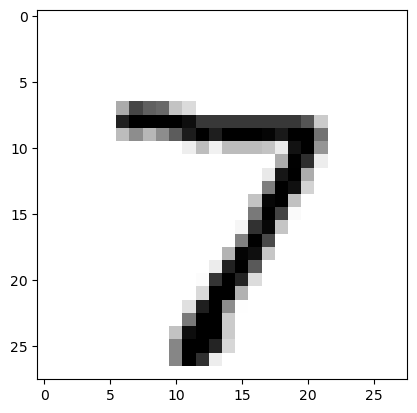

In [11]:
digit = test_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary) # cmap=plt.cm.binary: binary color map
plt.show()

### [3] 使用tensorflow.Keras搭建一个有效识别图案的神经网络

1.layers:表示神经网络中的一个数据处理层。(dense:全连接层)  

2.models.Sequential():表示把每一个数据处理层串联起来.  

3.layers.Dense(…):构造一个数据处理层。 

4.input_shape(28*28,):表示当前处理层接收的数据格式必须是长和宽都是28的二维数组, 后面的“,“表示数组里面的每一个元素到底包含多少个数字都没有关系.  

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
               metrics=['accuracy']) # rmsprop 是一种优化器，categorical_crossentropy 是损失函数，accuracy 是指标

### [4] 在把数据输入到网络模型之前，把数据做归一化处理:  

1.reshape(60000, 28*28):train_images数组原来含有60000个元素, 每个元素是一个28行, 28列的二维数组,   
现在把每个二维数组转变为一个含有28*28个元素的一维数组. 

2.由于数字图案是一个灰度图, 图片中每个像素点值的大小范围在0到255之间.  

3.train_images.astype(“float32”)/255 把每个像素点的值从范围0-255转变为范围在0-1之间的浮点值。  


In [13]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

把图片对应的标记也做一个更改:  

目前所有图片的数字图案对应的是0到9。  

例如test_images[0]对应的是数字7的手写图案, 那么其对应的标记test_labels[0]的值就是7。  

我们需要把数值7变成一个含有10个元素的数组, 然后在第8个元素设置为1, 其他元素设置为0。  

例如test_lables[0] 的值由7转变为数组[0,0,0,0,0,0,0,1,0,0] ---one hot  

In [14]:
from tensorflow.keras.utils import to_categorical
print("before change:" ,test_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("after change: ", test_labels[0])

before change: 7
after change:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### [5] 把数据输入网络进行训练:

train_images:用于训练的手写数字图片;  

train_labels:对应的是图片的标记;  

batch_size:每次网络从输入的图片数组中随机选取128个作为一组进行计算。  

epochs:每次计算的循环是五次  

In [15]:
network.fit(train_images, train_labels, epochs=10, batch_size = 256)

Epoch 1/10
235/235 [==============================] - 1s 2ms/step - loss: 0.3113 - accuracy: 0.9114
Epoch 2/10
235/235 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9625
Epoch 3/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9758
Epoch 4/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9824
Epoch 5/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9858
Epoch 6/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9893
Epoch 7/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9920
Epoch 8/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9937
Epoch 9/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9955
Epoch 10/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9966

### [6] 测试数据输入，检验网络学习后的图片识别效果.

识别效果与硬件有关(CPU/GPU)。

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=1)
print(test_loss) 
print('test_acc', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0622 - accuracy: 0.9829
0.06217493116855621
test_acc 0.9829000234603882


### [7] 输入一张手写数字图片到网络中，看看它的识别效果

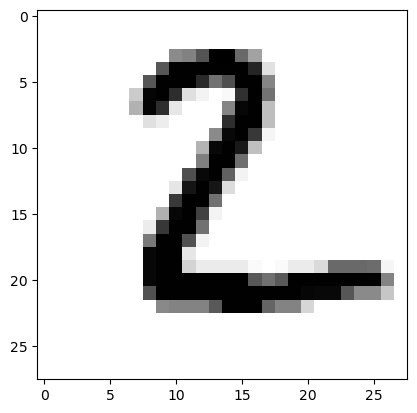

313/313 [==============================] - 0s 577us/step
the number for the picture is :  2


'\n# 改进预测结果的获取方式：在预测代码中，使用了 for 循环和判断 res[1][i] == 1 来获取预测结果。\n# 由于 softmax 的输出是概率分布，可能不会有值完全等于 1。建议使用 np.argmax() 来获取预测结果的索引：\n\nimport numpy as np\npredicted_label = np.argmax(res[1])\nprint("The number for the picture is:", predicted_label)\n'

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = test_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
test_images = test_images.reshape((10000, 28*28))
result = network.predict(test_images)

for i in range(result[1].shape[0]):
    if (result[1][i] == 1):
        print("the number for the picture is : ", i)
        break
    

'''
# 改进预测结果的获取方式：在预测代码中，使用了 for 循环和判断 res[1][i] == 1 来获取预测结果。
# 由于 softmax 的输出是概率分布，可能不会有值完全等于 1。建议使用 np.argmax() 来获取预测结果的索引：

import numpy as np
predicted_label = np.argmax(res[1])
print("The number for the picture is:", predicted_label)
'''

### [8] 保存和加载模型：

训练完成后，您可以保存模型，以便在需要时直接加载，而无需重新训练。

In [18]:
# network.save('mnist_model.h5')

# from tensorflow.keras.models import load_model
# network = load_model('mnist_model.h5')